In [2]:
import dotenv

dotenv.load_dotenv()

import sqlite3
from langgraph.graph import StateGraph, START, END
from langchain.chat_models import init_chat_model
from langgraph.graph.message import MessagesState
from langgraph.checkpoint.sqlite import SqliteSaver

llm = init_chat_model("openai:gpt-4o-mini")

conn = sqlite3.connect(
    "memory.db",
    check_same_thread=False,
)

config = {
    "configurable": {
        "thread_id": "0_x",
    },
}

In [3]:
class State(MessagesState):
    pass


graph_builder = StateGraph(State)

In [4]:
def chatbot(state: State):
    response = llm.invoke(state["messages"])
    return {
        "messages": [response],
    }

In [5]:
graph_builder.add_node("chatbot", chatbot)

graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

graph = graph_builder.compile(
    checkpointer=SqliteSaver(conn),
)

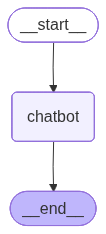

In [6]:
display(graph)

In [12]:
result = graph.invoke(
    {
        "messages": [
            {
                "role": "user",
                "content": "i'm 38 years old",
            },
        ]
    },
    config=config,
)

In [13]:
for message in result["messages"]:
    message.pretty_print()

================================ Human Message =================================

I live in Europe now. And the city I live in is Valencia.
================================== Ai Message ==================================

Valencia is a beautiful city in Spain, known for its rich history, stunning architecture, and delicious cuisine, including the famous paella. It also boasts lovely beaches, vibrant cultural scenes, and beautiful parks like the Turia Gardens. If you have any questions about things to do, places to visit, or local customs in Valencia, feel free to ask!
================================ Human Message =================================

how old are you
================================== Ai Message ==================================

I don’t have an age in the traditional sense, but I was created by OpenAI and released in November 2022. My knowledge is up to date until October 2023. Is there anything specific you’d like to know?
================================ Human Message

In [25]:
state_history = graph.get_state_history(config)
for state_snapshot in list(state_history):
    print(state_snapshot.next)
    print(state_snapshot.config)
    print(state_snapshot.values["messages"])
    print("=========\n")

()
{'configurable': {'thread_id': '0_x', 'checkpoint_ns': '', 'checkpoint_id': '1f0a6646-9129-6d9a-8008-92b2c0e7ad90'}}
[HumanMessage(content='I live in Europe now. And the city I live in is Valencia.', additional_kwargs={}, response_metadata={}, id='909bad83-022e-442d-9490-b700010fcf58'), AIMessage(content='Valencia is a beautiful city in Spain, known for its rich history, stunning architecture, and delicious cuisine, including the famous paella. It also boasts lovely beaches, vibrant cultural scenes, and beautiful parks like the Turia Gardens. If you have any questions about things to do, places to visit, or local customs in Valencia, feel free to ask!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 72, 'prompt_tokens': 22, 'total_tokens': 94, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_token

In [18]:
state_history = graph.get_state_history(config)

to_fork = list(state_history)[-8]

to_fork.config

{'configurable': {'thread_id': '0_x',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0a6625-238d-6285-8006-81c8073903dd'}}

In [20]:
from langchain_core.messages import HumanMessage

graph.update_state(
    to_fork.config,
    {
        "messages": [
            HumanMessage(
                content="I live in Europe now. And the city I live in is Zagreb.",
                id="d10038ab-ccb0-4821-aeb4-8f3213a0e7dc",
            )
        ]
    },
)

{'configurable': {'thread_id': '0_x',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0a6638-7473-6a50-8007-e3eaf97b8375'}}

In [23]:
forked_state = graph.get_state_history(
    {
        'configurable': {
            'thread_id': '0_x',
            'checkpoint_ns': '',
            'checkpoint_id': '1f0a6638-7473-6a50-8007-e3eaf97b8375'
        }
    }
)

list(forked_state)

[StateSnapshot(values={'messages': [HumanMessage(content='I live in Europe now. And the city I live in is Valencia.', additional_kwargs={}, response_metadata={}, id='909bad83-022e-442d-9490-b700010fcf58'), AIMessage(content='Valencia is a beautiful city in Spain, known for its rich history, stunning architecture, and delicious cuisine, including the famous paella. It also boasts lovely beaches, vibrant cultural scenes, and beautiful parks like the Turia Gardens. If you have any questions about things to do, places to visit, or local customs in Valencia, feel free to ask!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 72, 'prompt_tokens': 22, 'total_tokens': 94, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559

In [28]:

# 업데이트 된 시점부터 다시 대화 시작.
result = graph.invoke(
    None,
    {
        'configurable': {
            'thread_id': '0_x',
            'checkpoint_ns': '',
            'checkpoint_id': '1f0a6638-7473-6a50-8007-e3eaf97b8375'
        }
    }
)

for message in result["messages"]:
    message.pretty_print()

================================ Human Message =================================

I live in Europe now. And the city I live in is Valencia.
================================== Ai Message ==================================

Valencia is a beautiful city in Spain, known for its rich history, stunning architecture, and delicious cuisine, including the famous paella. It also boasts lovely beaches, vibrant cultural scenes, and beautiful parks like the Turia Gardens. If you have any questions about things to do, places to visit, or local customs in Valencia, feel free to ask!
================================ Human Message =================================

how old are you
================================== Ai Message ==================================

I don’t have an age in the traditional sense, but I was created by OpenAI and released in November 2022. My knowledge is up to date until October 2023. Is there anything specific you’d like to know?
================================ Human Message